### Given a Bank customer, can we build a classifier which can determine whether they will leave in the next 6 months or not?

### Dataset is downloaded from https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Bank_Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
print("The total number of null values:", df.isnull().sum().sum() )
print("The number of duplicate columns:", df.duplicated().sum())

The total number of null values: 0
The number of duplicate columns: 0


In [7]:
df.duplicated().sum()

0

In [8]:
import warnings
warnings.filterwarnings(action='ignore')

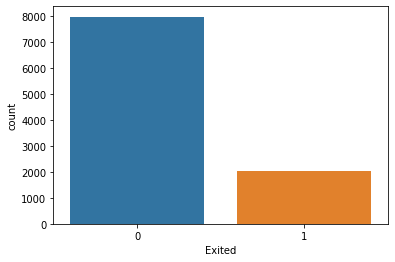

In [9]:
sns.countplot(df["Exited"])
plt.show()

In [10]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

* This is imbalance data

In [11]:
# Dropping RowNumber and CustomerId as they do not related to the label
df.drop(['RowNumber', 'CustomerId'], axis=1, inplace=True)

In [12]:
df_num = df.select_dtypes(exclude='object')

In [13]:
df_num.shape

(10000, 9)

## EDA

### Lets check the Numerical columns

<Figure size 432x288 with 0 Axes>

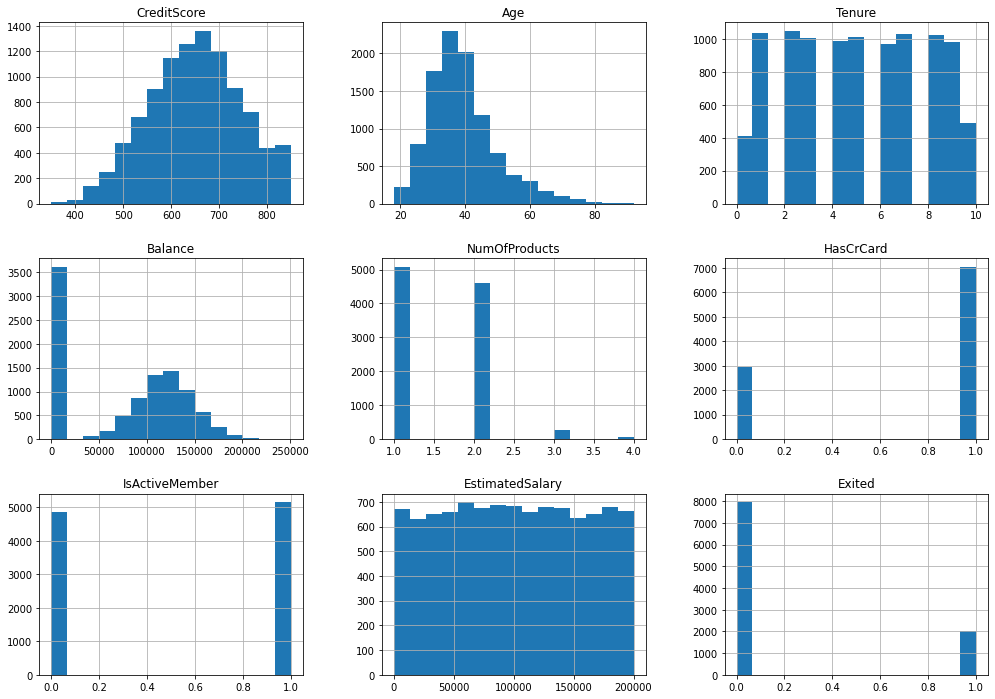

In [14]:
plt.figure()
df_num.hist(bins=15, figsize=(17,12))
plt.show()

In [15]:
df_num.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [16]:
num_col = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

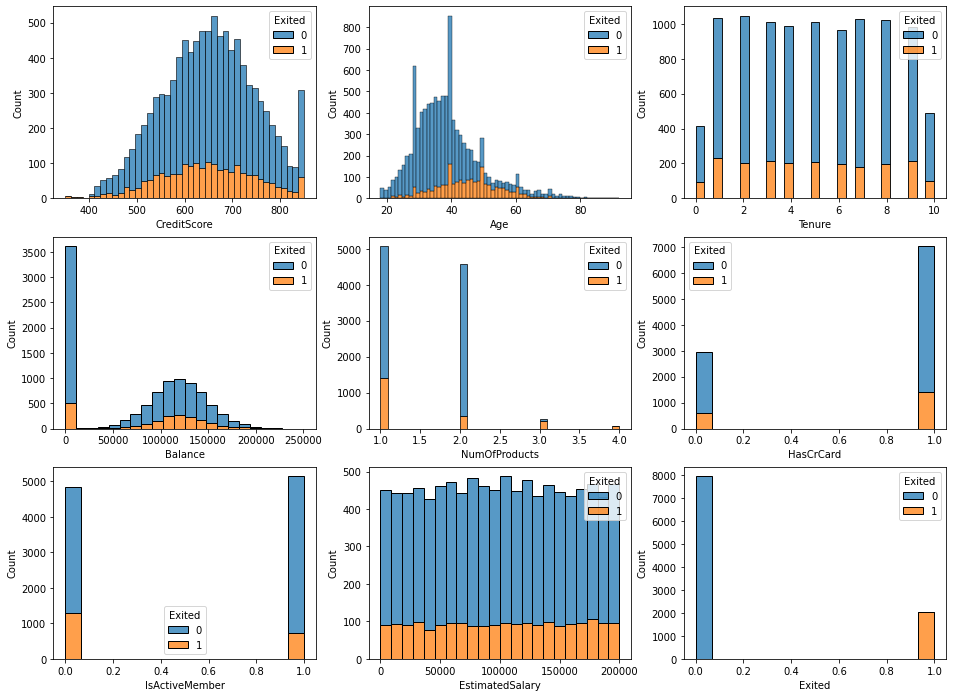

In [17]:
i=1
plt.figure(figsize=(16,12))
for col in df_num:
    plt.subplot(3,3,i)
    sns.histplot(data = df_num, x=col, hue='Exited', multiple='stack')
    i+=1
    
plt.show()

* Average Age of Exited customers are higher
* Distribution of balance is same

* NumOfProducts, isActiveMember can be importtant features as the distribution for exited and non exited categories are different
* EstimatedSalary, HasCrCard, CreditScore, Tenure have minimum difference in distribution for the two label categories

### Let us now see the correlation to confirm the dependencies

In [18]:
corr_mat = df.corr()
corr_mat['Exited'].sort_values(ascending=False)

Exited             1.000000
Age                0.285323
Balance            0.118533
EstimatedSalary    0.012097
HasCrCard         -0.007138
Tenure            -0.014001
CreditScore       -0.027094
NumOfProducts     -0.047820
IsActiveMember    -0.156128
Name: Exited, dtype: float64

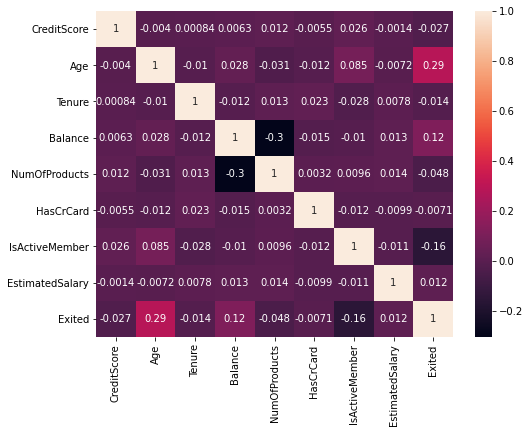

In [19]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_mat, annot=True)
plt.show()

* To improve speed, we can remove 'HasCrCard, Tenure, EstimatedSalary' columns later

### Lets check the Categoical columns

In [20]:
df_cat = df.select_dtypes(include='object')
df_cat.head()

,Surname,Geography,Gender
0,Hargrave,France,Female
1,Hill,Spain,Female
2,Onio,France,Female
3,Boni,France,Female
4,Mitchell,Spain,Female


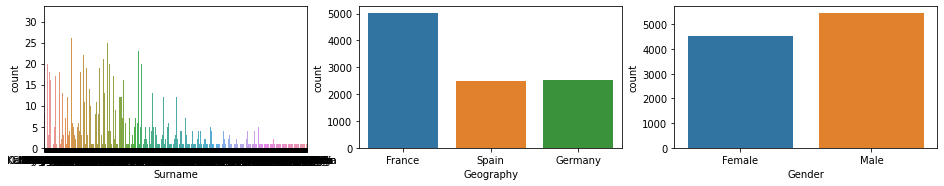

In [21]:
i=1
plt.figure(figsize=(16,2.6))
for col in df_cat:
    plt.subplot(1,3,i)
    sns.countplot(df_cat[col])
    i+=1
    

In [22]:
df.drop(['Surname'], axis=1, inplace=True)

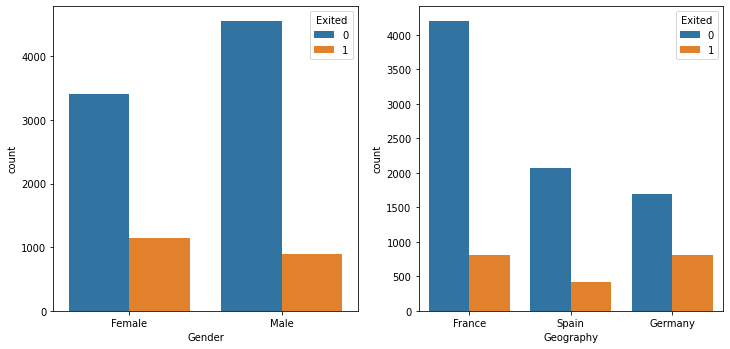

In [23]:
plt.figure(figsize=(12,5.6))
plt.subplot(1,2,1)
sns.countplot(data= df, x='Gender', hue='Exited')
plt.subplot(1,2,2)
sns.countplot(data= df, x='Geography', hue='Exited')
plt.show()

* Both geography and gender have different distribution for Exited and not exited category

### standardize data

In [24]:
df1 = df.copy()

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [26]:
df_num.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [27]:
cols_to_standardize = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
df1[cols_to_standardize] = sc.fit_transform(df1[cols_to_standardize])

In [28]:
df1

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.326221,France,Female,0.293517,-1.041760,-1.225848,1,1,1,0.021886,1
1,-0.440036,Spain,Female,0.198164,-1.387538,0.117350,1,0,1,0.216534,0
2,-1.536794,France,Female,0.293517,1.032908,1.333053,3,1,0,0.240687,1
3,0.501521,France,Female,0.007457,-1.387538,-1.225848,2,0,0,-0.108918,0
4,2.063884,Spain,Female,0.388871,-1.041760,0.785728,1,1,1,-0.365276,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,France,Male,0.007457,-0.004426,-1.225848,2,1,0,-0.066419,0
9996,-1.391939,France,Male,-0.373958,1.724464,-0.306379,1,1,1,0.027988,0
9997,0.604988,France,Female,-0.278604,0.687130,-1.225848,1,0,1,-1.008643,1
9998,1.256835,Germany,Male,0.293517,-0.695982,-0.022608,2,1,0,-0.125231,1


### Label Encoding

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['Geography'] = le.fit_transform(df1['Geography'])
df1['Gender'] = le.fit_transform(df1['Gender'])

In [30]:
df1

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.326221,0,0,0.293517,-1.041760,-1.225848,1,1,1,0.021886,1
1,-0.440036,2,0,0.198164,-1.387538,0.117350,1,0,1,0.216534,0
2,-1.536794,0,0,0.293517,1.032908,1.333053,3,1,0,0.240687,1
3,0.501521,0,0,0.007457,-1.387538,-1.225848,2,0,0,-0.108918,0
4,2.063884,2,0,0.388871,-1.041760,0.785728,1,1,1,-0.365276,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0,1,0.007457,-0.004426,-1.225848,2,1,0,-0.066419,0
9996,-1.391939,0,1,-0.373958,1.724464,-0.306379,1,1,1,0.027988,0
9997,0.604988,0,0,-0.278604,0.687130,-1.225848,1,0,1,-1.008643,1
9998,1.256835,1,1,0.293517,-0.695982,-0.022608,2,1,0,-0.125231,1


### Train test data

In [31]:
X = df1.drop(['Exited'], axis=1)
y = df1['Exited']

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25, stratify=y)

In [33]:
df1.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10000, 11), (8000, 10), (2000, 10), (8000,), (2000,))

In [34]:
print("----------Stratify Check-----------")
print("=====================================")
print(f'{y.value_counts()}, y ratio: {y.value_counts()[0]/y.value_counts()[1]}')
print(f'{y_train.value_counts()}, y_train ratio: {y_train.value_counts()[0]/y_train.value_counts()[1]}')
print(f'{y_test.value_counts()}, y_test ratio: {y_test.value_counts()[0]/y_test.value_counts()[1]}')

----------Stratify Check-----------
0    7963
1    2037
Name: Exited, dtype: int64, y ratio: 3.9091801669121256
0    6370
1    1630
Name: Exited, dtype: int64, y_train ratio: 3.9079754601226995
0    1593
1     407
Name: Exited, dtype: int64, y_test ratio: 3.914004914004914


In [35]:
from tensorflow import keras

In [36]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(10,), activation='relu'),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                110       
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 171
Trainable params: 171
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [38]:
hist = model.fit(X_train, y_train, epochs=2000)

Epoch 1/2000
250/250 [==============================] - 3s 4ms/step - loss: 0.4979 - accuracy: 0.7880
Epoch 2/2000
250/250 [==============================] - 1s 4ms/step - loss: 0.4508 - accuracy: 0.7984
Epoch 3/2000
250/250 [==============================] - 1s 4ms/step - loss: 0.4408 - accuracy: 0.8031
Epoch 4/2000
250/250 [==============================] - 1s 4ms/step - loss: 0.4367 - accuracy: 0.8055
Epoch 5/2000
250/250 [==============================] - 1s 4ms/step - loss: 0.4334 - accuracy: 0.8086
Epoch 6/2000
250/250 [==============================] - 1s 4ms/step - loss: 0.4308 - accuracy: 0.8112
Epoch 7/2000
250/250 [==============================] - 1s 4ms/step - loss: 0.4281 - accuracy: 0.8146
Epoch 8/2000
250/250 [==============================] - 1s 5ms/step - loss: 0.4255 - accuracy: 0.8175
Epoch 9/2000
250/250 [==============================] - 1s 4ms/step - loss: 0.4222 - accuracy: 0.8205
Epoch 10/2000
250/250 [==============================] - 1s 4ms/step - loss: 0.419

250/250 [==============================] - 1s 4ms/step - loss: 0.3496 - accuracy: 0.8526
Epoch 81/2000
250/250 [==============================] - 1s 4ms/step - loss: 0.3487 - accuracy: 0.8568
Epoch 82/2000
250/250 [==============================] - 1s 4ms/step - loss: 0.3500 - accuracy: 0.8547
Epoch 83/2000
250/250 [==============================] - 1s 4ms/step - loss: 0.3482 - accuracy: 0.8572
Epoch 84/2000
250/250 [==============================] - 1s 4ms/step - loss: 0.3482 - accuracy: 0.8553
Epoch 85/2000
250/250 [==============================] - 1s 4ms/step - loss: 0.3476 - accuracy: 0.8550
Epoch 86/2000
250/250 [==============================] - 1s 4ms/step - loss: 0.3471 - accuracy: 0.8569
Epoch 87/2000
250/250 [==============================] - 1s 4ms/step - loss: 0.3469 - accuracy: 0.8555
Epoch 88/2000
250/250 [==============================] - 1s 4ms/step - loss: 0.3452 - accuracy: 0.8586
Epoch 89/2000
250/250 [==============================] - 1s 4ms/step - loss: 0.3462 - a

250/250 [==============================] - 1s 4ms/step - loss: 0.3337 - accuracy: 0.8630
Epoch 159/2000
250/250 [==============================] - 1s 4ms/step - loss: 0.3339 - accuracy: 0.8618
Epoch 160/2000
250/250 [==============================] - 1s 4ms/step - loss: 0.3344 - accuracy: 0.8629
Epoch 161/2000
250/250 [==============================] - 1s 4ms/step - loss: 0.3333 - accuracy: 0.8631
Epoch 162/2000
250/250 [==============================] - 1s 4ms/step - loss: 0.3340 - accuracy: 0.8622
Epoch 163/2000
250/250 [==============================] - 1s 4ms/step - loss: 0.3350 - accuracy: 0.8619
Epoch 164/2000
250/250 [==============================] - 1s 4ms/step - loss: 0.3334 - accuracy: 0.8600
Epoch 165/2000
250/250 [==============================] - 1s 4ms/step - loss: 0.3345 - accuracy: 0.8608
Epoch 166/2000
250/250 [==============================] - 1s 5ms/step - loss: 0.3328 - accuracy: 0.8629: 0s - loss: 0.3
Epoch 167/2000
250/250 [==============================] - 1s 4m

250/250 [==============================] - 1s 4ms/step - loss: 0.3310 - accuracy: 0.8620
Epoch 237/2000
250/250 [==============================] - 1s 4ms/step - loss: 0.3303 - accuracy: 0.8646
Epoch 238/2000
250/250 [==============================] - 1s 4ms/step - loss: 0.3305 - accuracy: 0.8624
Epoch 239/2000
250/250 [==============================] - 1s 4ms/step - loss: 0.3307 - accuracy: 0.8648
Epoch 240/2000
250/250 [==============================] - 1s 4ms/step - loss: 0.3302 - accuracy: 0.8636
Epoch 241/2000
250/250 [==============================] - 1s 4ms/step - loss: 0.3312 - accuracy: 0.8629
Epoch 242/2000
250/250 [==============================] - 1s 4ms/step - loss: 0.3305 - accuracy: 0.8641
Epoch 243/2000
250/250 [==============================] - 1s 4ms/step - loss: 0.3298 - accuracy: 0.8616
Epoch 244/2000
250/250 [==============================] - 1s 4ms/step - loss: 0.3316 - accuracy: 0.8648
Epoch 245/2000
250/250 [==============================] - 1s 4ms/step - loss: 0

250/250 [==============================] - 1s 3ms/step - loss: 0.3297 - accuracy: 0.8619
Epoch 315/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3299 - accuracy: 0.8636
Epoch 316/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3307 - accuracy: 0.8634
Epoch 317/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3295 - accuracy: 0.8651
Epoch 318/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3297 - accuracy: 0.8649
Epoch 319/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3310 - accuracy: 0.8629
Epoch 320/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3291 - accuracy: 0.8636
Epoch 321/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3295 - accuracy: 0.8639
Epoch 322/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3297 - accuracy: 0.8643
Epoch 323/2000
250/250 [==============================] - 1s 3ms/step - loss: 0

250/250 [==============================] - 1s 5ms/step - loss: 0.3278 - accuracy: 0.8649
Epoch 393/2000
250/250 [==============================] - 1s 5ms/step - loss: 0.3280 - accuracy: 0.8627
Epoch 394/2000
250/250 [==============================] - 1s 4ms/step - loss: 0.3291 - accuracy: 0.8618
Epoch 395/2000
250/250 [==============================] - 1s 4ms/step - loss: 0.3295 - accuracy: 0.8636
Epoch 396/2000
250/250 [==============================] - 1s 5ms/step - loss: 0.3281 - accuracy: 0.8643
Epoch 397/2000
250/250 [==============================] - 1s 5ms/step - loss: 0.3295 - accuracy: 0.8621
Epoch 398/2000
250/250 [==============================] - 1s 4ms/step - loss: 0.3290 - accuracy: 0.8643
Epoch 399/2000
250/250 [==============================] - 1s 4ms/step - loss: 0.3275 - accuracy: 0.8635
Epoch 400/2000
250/250 [==============================] - 1s 5ms/step - loss: 0.3286 - accuracy: 0.8641
Epoch 401/2000
250/250 [==============================] - 1s 4ms/step - loss: 0

250/250 [==============================] - 1s 4ms/step - loss: 0.3278 - accuracy: 0.8639
Epoch 471/2000
250/250 [==============================] - 1s 5ms/step - loss: 0.3272 - accuracy: 0.8649
Epoch 472/2000
250/250 [==============================] - 1s 5ms/step - loss: 0.3285 - accuracy: 0.8655
Epoch 473/2000
250/250 [==============================] - 1s 5ms/step - loss: 0.3286 - accuracy: 0.8620
Epoch 474/2000
250/250 [==============================] - 1s 4ms/step - loss: 0.3275 - accuracy: 0.8644
Epoch 475/2000
250/250 [==============================] - 1s 5ms/step - loss: 0.3280 - accuracy: 0.8652
Epoch 476/2000
250/250 [==============================] - 1s 6ms/step - loss: 0.3272 - accuracy: 0.8640
Epoch 477/2000
250/250 [==============================] - 1s 5ms/step - loss: 0.3286 - accuracy: 0.8636
Epoch 478/2000
250/250 [==============================] - 1s 5ms/step - loss: 0.3277 - accuracy: 0.8637
Epoch 479/2000
250/250 [==============================] - 1s 5ms/step - loss: 0

250/250 [==============================] - 1s 4ms/step - loss: 0.3265 - accuracy: 0.8645
Epoch 549/2000
250/250 [==============================] - 1s 4ms/step - loss: 0.3287 - accuracy: 0.8630
Epoch 550/2000
250/250 [==============================] - 1s 4ms/step - loss: 0.3264 - accuracy: 0.8673
Epoch 551/2000
250/250 [==============================] - 1s 5ms/step - loss: 0.3288 - accuracy: 0.8641
Epoch 552/2000
250/250 [==============================] - 1s 4ms/step - loss: 0.3282 - accuracy: 0.8643
Epoch 553/2000
250/250 [==============================] - 1s 4ms/step - loss: 0.3281 - accuracy: 0.8648
Epoch 554/2000
250/250 [==============================] - 1s 4ms/step - loss: 0.3280 - accuracy: 0.8622
Epoch 555/2000
250/250 [==============================] - 1s 4ms/step - loss: 0.3273 - accuracy: 0.8639
Epoch 556/2000
250/250 [==============================] - 1s 4ms/step - loss: 0.3280 - accuracy: 0.8629
Epoch 557/2000
250/250 [==============================] - 1s 4ms/step - loss: 0

250/250 [==============================] - 1s 3ms/step - loss: 0.3263 - accuracy: 0.8630
Epoch 627/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3276 - accuracy: 0.8648
Epoch 628/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3274 - accuracy: 0.8651
Epoch 629/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3271 - accuracy: 0.8641
Epoch 630/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3276 - accuracy: 0.8649
Epoch 631/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3276 - accuracy: 0.8624
Epoch 632/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3277 - accuracy: 0.8627
Epoch 633/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3276 - accuracy: 0.8633
Epoch 634/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3272 - accuracy: 0.8649
Epoch 635/2000
250/250 [==============================] - 1s 3ms/step - loss: 0

250/250 [==============================] - 1s 3ms/step - loss: 0.3267 - accuracy: 0.8636
Epoch 705/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3267 - accuracy: 0.8651
Epoch 706/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3279 - accuracy: 0.8649
Epoch 707/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3266 - accuracy: 0.8637
Epoch 708/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3261 - accuracy: 0.8665
Epoch 709/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3268 - accuracy: 0.8652
Epoch 710/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3278 - accuracy: 0.8622
Epoch 711/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3290 - accuracy: 0.8634
Epoch 712/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3272 - accuracy: 0.8634
Epoch 713/2000
250/250 [==============================] - 1s 3ms/step - loss: 0

250/250 [==============================] - 1s 3ms/step - loss: 0.3265 - accuracy: 0.8649
Epoch 783/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3269 - accuracy: 0.8659
Epoch 784/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3259 - accuracy: 0.8652
Epoch 785/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3277 - accuracy: 0.8644
Epoch 786/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3271 - accuracy: 0.8650
Epoch 787/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3271 - accuracy: 0.8656
Epoch 788/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3273 - accuracy: 0.8643
Epoch 789/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3263 - accuracy: 0.8643
Epoch 790/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3276 - accuracy: 0.8652
Epoch 791/2000
250/250 [==============================] - 1s 3ms/step - loss: 0

250/250 [==============================] - 1s 3ms/step - loss: 0.3274 - accuracy: 0.8670
Epoch 861/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3269 - accuracy: 0.8659
Epoch 862/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3272 - accuracy: 0.8660
Epoch 863/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3270 - accuracy: 0.8648
Epoch 864/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3266 - accuracy: 0.8658
Epoch 865/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3267 - accuracy: 0.8659
Epoch 866/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3260 - accuracy: 0.8668
Epoch 867/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3265 - accuracy: 0.8655
Epoch 868/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3264 - accuracy: 0.8656
Epoch 869/2000
250/250 [==============================] - 1s 3ms/step - loss: 0

250/250 [==============================] - 1s 3ms/step - loss: 0.3264 - accuracy: 0.8645
Epoch 939/2000
250/250 [==============================] - 1s 2ms/step - loss: 0.3274 - accuracy: 0.8649
Epoch 940/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3263 - accuracy: 0.8645
Epoch 941/2000
250/250 [==============================] - 1s 2ms/step - loss: 0.3256 - accuracy: 0.8648
Epoch 942/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3262 - accuracy: 0.8643
Epoch 943/2000
250/250 [==============================] - 1s 2ms/step - loss: 0.3266 - accuracy: 0.8649
Epoch 944/2000
250/250 [==============================] - 1s 2ms/step - loss: 0.3270 - accuracy: 0.8652
Epoch 945/2000
250/250 [==============================] - 1s 2ms/step - loss: 0.3264 - accuracy: 0.8646
Epoch 946/2000
250/250 [==============================] - 1s 2ms/step - loss: 0.3261 - accuracy: 0.8648
Epoch 947/2000
250/250 [==============================] - 1s 2ms/step - loss: 0

250/250 [==============================] - 1s 3ms/step - loss: 0.3253 - accuracy: 0.8671
Epoch 1017/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3263 - accuracy: 0.8654
Epoch 1018/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3258 - accuracy: 0.8671
Epoch 1019/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3277 - accuracy: 0.8649
Epoch 1020/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3258 - accuracy: 0.8652
Epoch 1021/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3263 - accuracy: 0.8661
Epoch 1022/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3262 - accuracy: 0.8644
Epoch 1023/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3256 - accuracy: 0.8656
Epoch 1024/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3255 - accuracy: 0.8664
Epoch 1025/2000
250/250 [==============================] - 1s 3ms/step 

250/250 [==============================] - 1s 3ms/step - loss: 0.3265 - accuracy: 0.8668
Epoch 1095/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3260 - accuracy: 0.8652
Epoch 1096/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3254 - accuracy: 0.8659
Epoch 1097/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3257 - accuracy: 0.8655
Epoch 1098/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3262 - accuracy: 0.8671
Epoch 1099/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3266 - accuracy: 0.8650
Epoch 1100/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3261 - accuracy: 0.8662
Epoch 1101/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3259 - accuracy: 0.8651
Epoch 1102/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3278 - accuracy: 0.8648
Epoch 1103/2000
250/250 [==============================] - 1s 3ms/step 

250/250 [==============================] - 1s 3ms/step - loss: 0.3271 - accuracy: 0.8644
Epoch 1173/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3262 - accuracy: 0.8664
Epoch 1174/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3248 - accuracy: 0.8670
Epoch 1175/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3259 - accuracy: 0.8661
Epoch 1176/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3260 - accuracy: 0.8659
Epoch 1177/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3256 - accuracy: 0.8670
Epoch 1178/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3253 - accuracy: 0.8664
Epoch 1179/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3249 - accuracy: 0.8652
Epoch 1180/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3258 - accuracy: 0.8666
Epoch 1181/2000
250/250 [==============================] - 1s 3ms/step 

250/250 [==============================] - 1s 3ms/step - loss: 0.3243 - accuracy: 0.8656
Epoch 1251/2000
250/250 [==============================] - 1s 4ms/step - loss: 0.3255 - accuracy: 0.8665
Epoch 1252/2000
250/250 [==============================] - 1s 4ms/step - loss: 0.3251 - accuracy: 0.8662
Epoch 1253/2000
250/250 [==============================] - 1s 4ms/step - loss: 0.3246 - accuracy: 0.8652
Epoch 1254/2000
250/250 [==============================] - 1s 2ms/step - loss: 0.3249 - accuracy: 0.8664
Epoch 1255/2000
250/250 [==============================] - 1s 2ms/step - loss: 0.3250 - accuracy: 0.8666
Epoch 1256/2000
250/250 [==============================] - 1s 4ms/step - loss: 0.3250 - accuracy: 0.8659
Epoch 1257/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3254 - accuracy: 0.8637
Epoch 1258/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3262 - accuracy: 0.8651
Epoch 1259/2000
250/250 [==============================] - 1s 4ms/step 

250/250 [==============================] - 1s 4ms/step - loss: 0.3245 - accuracy: 0.8637
Epoch 1329/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3239 - accuracy: 0.8661
Epoch 1330/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3257 - accuracy: 0.8648
Epoch 1331/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3243 - accuracy: 0.8661
Epoch 1332/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3249 - accuracy: 0.8651
Epoch 1333/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3245 - accuracy: 0.8646
Epoch 1334/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3243 - accuracy: 0.8650
Epoch 1335/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3243 - accuracy: 0.8683
Epoch 1336/2000
250/250 [==============================] - 1s 4ms/step - loss: 0.3238 - accuracy: 0.8658
Epoch 1337/2000
250/250 [==============================] - 1s 3ms/step 

250/250 [==============================] - 1s 3ms/step - loss: 0.3229 - accuracy: 0.8668
Epoch 1407/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3237 - accuracy: 0.8669
Epoch 1408/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3237 - accuracy: 0.8659
Epoch 1409/2000
250/250 [==============================] - 1s 4ms/step - loss: 0.3240 - accuracy: 0.8662
Epoch 1410/2000
250/250 [==============================] - 1s 4ms/step - loss: 0.3248 - accuracy: 0.8662
Epoch 1411/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3235 - accuracy: 0.8668
Epoch 1412/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3240 - accuracy: 0.8659
Epoch 1413/2000
250/250 [==============================] - 1s 4ms/step - loss: 0.3252 - accuracy: 0.8654
Epoch 1414/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3245 - accuracy: 0.8646
Epoch 1415/2000
250/250 [==============================] - 1s 3ms/step 

250/250 [==============================] - 1s 3ms/step - loss: 0.3231 - accuracy: 0.8665
Epoch 1485/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3240 - accuracy: 0.8666
Epoch 1486/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3240 - accuracy: 0.8662
Epoch 1487/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3243 - accuracy: 0.8659
Epoch 1488/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3244 - accuracy: 0.8683
Epoch 1489/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3232 - accuracy: 0.8671
Epoch 1490/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3240 - accuracy: 0.8661
Epoch 1491/2000
250/250 [==============================] - 1s 4ms/step - loss: 0.3231 - accuracy: 0.8652
Epoch 1492/2000
250/250 [==============================] - 1s 4ms/step - loss: 0.3234 - accuracy: 0.8658
Epoch 1493/2000
250/250 [==============================] - 1s 3ms/step 

250/250 [==============================] - 1s 4ms/step - loss: 0.3230 - accuracy: 0.8675
Epoch 1563/2000
250/250 [==============================] - 1s 4ms/step - loss: 0.3233 - accuracy: 0.8652
Epoch 1564/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3224 - accuracy: 0.8671
Epoch 1565/2000
250/250 [==============================] - 1s 4ms/step - loss: 0.3234 - accuracy: 0.8661
Epoch 1566/2000
250/250 [==============================] - 1s 4ms/step - loss: 0.3239 - accuracy: 0.8661
Epoch 1567/2000
250/250 [==============================] - 1s 4ms/step - loss: 0.3226 - accuracy: 0.8677
Epoch 1568/2000
250/250 [==============================] - 1s 4ms/step - loss: 0.3242 - accuracy: 0.8656
Epoch 1569/2000
250/250 [==============================] - 1s 4ms/step - loss: 0.3235 - accuracy: 0.8662
Epoch 1570/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3232 - accuracy: 0.8675
Epoch 1571/2000
250/250 [==============================] - 1s 3ms/step 

250/250 [==============================] - 1s 4ms/step - loss: 0.3236 - accuracy: 0.8674
Epoch 1641/2000
250/250 [==============================] - 1s 4ms/step - loss: 0.3237 - accuracy: 0.8635
Epoch 1642/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3243 - accuracy: 0.8670
Epoch 1643/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3225 - accuracy: 0.8652
Epoch 1644/2000
250/250 [==============================] - 1s 4ms/step - loss: 0.3233 - accuracy: 0.8656
Epoch 1645/2000
250/250 [==============================] - 1s 4ms/step - loss: 0.3227 - accuracy: 0.8666
Epoch 1646/2000
250/250 [==============================] - 1s 4ms/step - loss: 0.3233 - accuracy: 0.8656
Epoch 1647/2000
250/250 [==============================] - 1s 4ms/step - loss: 0.3236 - accuracy: 0.8673
Epoch 1648/2000
250/250 [==============================] - 1s 4ms/step - loss: 0.3228 - accuracy: 0.8664
Epoch 1649/2000
250/250 [==============================] - 1s 4ms/step 

250/250 [==============================] - 1s 4ms/step - loss: 0.3235 - accuracy: 0.8687
Epoch 1719/2000
250/250 [==============================] - 1s 4ms/step - loss: 0.3221 - accuracy: 0.8658
Epoch 1720/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3228 - accuracy: 0.8664
Epoch 1721/2000
250/250 [==============================] - 1s 4ms/step - loss: 0.3235 - accuracy: 0.8662
Epoch 1722/2000
250/250 [==============================] - 1s 4ms/step - loss: 0.3222 - accuracy: 0.8671
Epoch 1723/2000
250/250 [==============================] - 1s 4ms/step - loss: 0.3222 - accuracy: 0.8680
Epoch 1724/2000
250/250 [==============================] - 1s 4ms/step - loss: 0.3228 - accuracy: 0.8670
Epoch 1725/2000
250/250 [==============================] - 1s 4ms/step - loss: 0.3229 - accuracy: 0.8675
Epoch 1726/2000
250/250 [==============================] - 1s 3ms/step - loss: 0.3234 - accuracy: 0.8661
Epoch 1727/2000
250/250 [==============================] - 1s 4ms/step 

250/250 [==============================] - 1s 2ms/step - loss: 0.3224 - accuracy: 0.8660
Epoch 1797/2000
250/250 [==============================] - 1s 2ms/step - loss: 0.3230 - accuracy: 0.8665
Epoch 1798/2000
250/250 [==============================] - 1s 2ms/step - loss: 0.3226 - accuracy: 0.8654
Epoch 1799/2000
250/250 [==============================] - 1s 2ms/step - loss: 0.3226 - accuracy: 0.8671
Epoch 1800/2000
250/250 [==============================] - 1s 2ms/step - loss: 0.3223 - accuracy: 0.8677
Epoch 1801/2000
250/250 [==============================] - 1s 2ms/step - loss: 0.3218 - accuracy: 0.8681
Epoch 1802/2000
250/250 [==============================] - 1s 2ms/step - loss: 0.3228 - accuracy: 0.8668
Epoch 1803/2000
250/250 [==============================] - 1s 2ms/step - loss: 0.3229 - accuracy: 0.8674
Epoch 1804/2000
250/250 [==============================] - 1s 2ms/step - loss: 0.3236 - accuracy: 0.8655
Epoch 1805/2000
250/250 [==============================] - 1s 2ms/step 

250/250 [==============================] - 1s 2ms/step - loss: 0.3218 - accuracy: 0.8661
Epoch 1875/2000
250/250 [==============================] - 1s 2ms/step - loss: 0.3219 - accuracy: 0.8680
Epoch 1876/2000
250/250 [==============================] - 1s 2ms/step - loss: 0.3226 - accuracy: 0.8656
Epoch 1877/2000
250/250 [==============================] - 1s 2ms/step - loss: 0.3230 - accuracy: 0.8675
Epoch 1878/2000
250/250 [==============================] - 1s 2ms/step - loss: 0.3236 - accuracy: 0.8650
Epoch 1879/2000
250/250 [==============================] - 1s 2ms/step - loss: 0.3232 - accuracy: 0.8666
Epoch 1880/2000
250/250 [==============================] - 1s 2ms/step - loss: 0.3229 - accuracy: 0.8654
Epoch 1881/2000
250/250 [==============================] - 1s 2ms/step - loss: 0.3235 - accuracy: 0.8652
Epoch 1882/2000
250/250 [==============================] - 1s 2ms/step - loss: 0.3225 - accuracy: 0.8676
Epoch 1883/2000
250/250 [==============================] - 1s 2ms/step 

250/250 [==============================] - 1s 2ms/step - loss: 0.3230 - accuracy: 0.8656
Epoch 1953/2000
250/250 [==============================] - 1s 2ms/step - loss: 0.3225 - accuracy: 0.8666
Epoch 1954/2000
250/250 [==============================] - 1s 2ms/step - loss: 0.3223 - accuracy: 0.8655
Epoch 1955/2000
250/250 [==============================] - 1s 2ms/step - loss: 0.3217 - accuracy: 0.8668
Epoch 1956/2000
250/250 [==============================] - 1s 2ms/step - loss: 0.3222 - accuracy: 0.8679
Epoch 1957/2000
250/250 [==============================] - 1s 2ms/step - loss: 0.3222 - accuracy: 0.8659
Epoch 1958/2000
250/250 [==============================] - 1s 2ms/step - loss: 0.3217 - accuracy: 0.8673
Epoch 1959/2000
250/250 [==============================] - 1s 2ms/step - loss: 0.3218 - accuracy: 0.8662
Epoch 1960/2000
250/250 [==============================] - 1s 2ms/step - loss: 0.3224 - accuracy: 0.8679
Epoch 1961/2000
250/250 [==============================] - 1s 2ms/step 

In [39]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.3231 - accuracy: 0.8695


[0.32314997911453247, 0.8694999814033508]

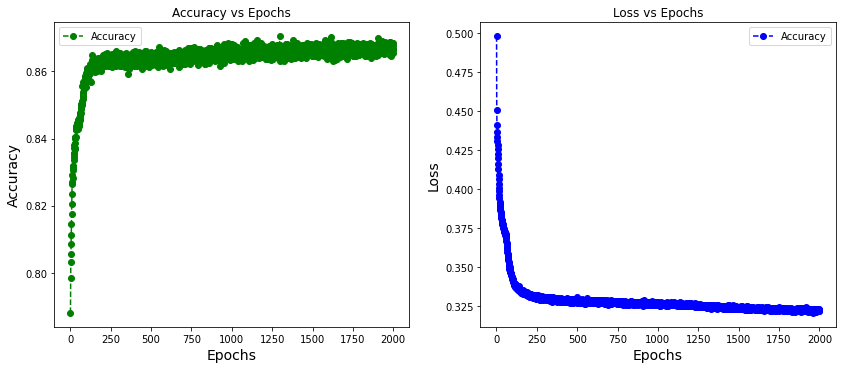

In [40]:
# Pltting Accuracy and loss
acc = hist.history['accuracy']
loss = hist.history['loss']
epochs = range(1, len(acc)+1)

fig, ax = plt.subplots(1,2, figsize=(14,5.6))

ax[0].plot(epochs, acc, 'go--', label='Accuracy')
ax[0].set_xlabel("Epochs", fontsize=14)
ax[0].set_ylabel("Accuracy", fontsize=14)
ax[0].set_title("Accuracy vs Epochs")
ax[0].legend()

ax[1].plot(epochs, loss, 'bo--', label='Accuracy')
ax[1].set_xlabel("Epochs", fontsize=14)
ax[1].set_ylabel("Loss", fontsize=14)
ax[1].set_title("Loss vs Epochs")
ax[1].legend()

plt.show()

In [41]:
predictions = model.predict(X_test)

In [42]:
predictions

array([[0.49358308],
       [0.25595284],
       [0.05774096],
       ...,
       [0.09179506],
       [0.12721145],
       [0.09305251]], dtype=float32)

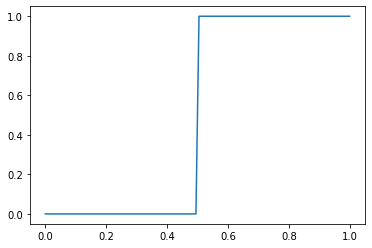

In [43]:
a = np.linspace(0,1,100)
b = np.round(a)
plt.plot(a, b)

In [44]:
y_pred = []
for p in predictions:
    if(p<0.5):
        y_pred.append(0)
    else:
        y_pred.append(1)

In [45]:
y_pred = np.round(predictions)

In [47]:
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support
cm = confusion_matrix(y_test, y_pred)
cm

array([[1532,   61],
       [ 200,  207]])

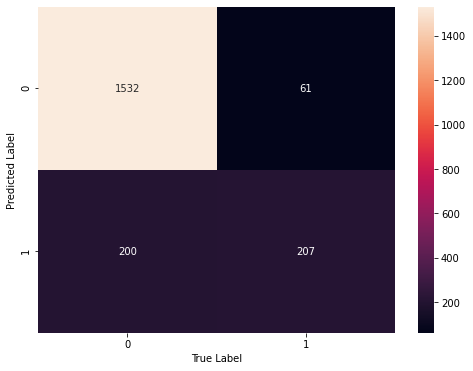

In [48]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.77      0.51      0.61       407

    accuracy                           0.87      2000
   macro avg       0.83      0.74      0.77      2000
weighted avg       0.86      0.87      0.86      2000



### As category 1 of label data is less in number compared to the category 0, the f-score is low for category 1. We have to improve the f1-score for 1 classification

In [50]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [51]:
def fit_report(X_train, y_train, X_test, y_test, epoch=150):
    model1 = keras.Sequential([
        keras.layers.Dense(10, input_shape=(10,), activation='relu'),
        keras.layers.Dense(5, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    
    model1.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])
    
    
    model1.fit(X_train, y_train, epochs=epoch)
    predictions = model1.predict(X_test)
    y_pred = np.round(predictions)
    
    score = model1.evaluate(X_test, y_test)
    print("Accuracy: ", score)
    
    clf_report = precision_recall_fscore_support(y_test, y_pred)
    print(classification_report(y_test, y_pred) )
    
    return y_pred, clf_report

In [52]:
y_pred_, clf_report = fit_report(X_train, y_train, X_test, y_test, 250)

Epoch 1/250
250/250 [==============================] - 2s 3ms/step - loss: 0.5556 - accuracy: 0.7715
Epoch 2/250
250/250 [==============================] - 1s 3ms/step - loss: 0.4537 - accuracy: 0.7979
Epoch 3/250
250/250 [==============================] - 1s 3ms/step - loss: 0.4380 - accuracy: 0.8036
Epoch 4/250
250/250 [==============================] - 1s 3ms/step - loss: 0.4309 - accuracy: 0.8087
Epoch 5/250
250/250 [==============================] - 1s 3ms/step - loss: 0.4264 - accuracy: 0.8134
Epoch 6/250
250/250 [==============================] - 1s 3ms/step - loss: 0.4219 - accuracy: 0.8199
Epoch 7/250
250/250 [==============================] - 1s 3ms/step - loss: 0.4174 - accuracy: 0.8245
Epoch 8/250
250/250 [==============================] - 1s 3ms/step - loss: 0.4131 - accuracy: 0.8290
Epoch 9/250
250/250 [==============================] - 1s 3ms/step - loss: 0.4076 - accuracy: 0.8320
Epoch 10/250
250/250 [==============================] - 1s 3ms/step - loss: 0.4037 - accura

250/250 [==============================] - 1s 2ms/step - loss: 0.3468 - accuracy: 0.8594
Epoch 82/250
250/250 [==============================] - 1s 2ms/step - loss: 0.3455 - accuracy: 0.8594
Epoch 83/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3451 - accuracy: 0.8594
Epoch 84/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3448 - accuracy: 0.8584
Epoch 85/250
250/250 [==============================] - 1s 2ms/step - loss: 0.3438 - accuracy: 0.8580
Epoch 86/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3436 - accuracy: 0.8586
Epoch 87/250
250/250 [==============================] - 1s 2ms/step - loss: 0.3432 - accuracy: 0.8597
Epoch 88/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3421 - accuracy: 0.8593
Epoch 89/250
250/250 [==============================] - 1s 2ms/step - loss: 0.3421 - accuracy: 0.8580
Epoch 90/250
250/250 [==============================] - 1s 2ms/step - loss: 0.3404 - accuracy: 

250/250 [==============================] - 1s 2ms/step - loss: 0.3303 - accuracy: 0.8630
Epoch 161/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3309 - accuracy: 0.8626
Epoch 162/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3304 - accuracy: 0.8648
Epoch 163/250
250/250 [==============================] - 1s 2ms/step - loss: 0.3301 - accuracy: 0.8640
Epoch 164/250
250/250 [==============================] - 1s 2ms/step - loss: 0.3300 - accuracy: 0.8631
Epoch 165/250
250/250 [==============================] - 1s 2ms/step - loss: 0.3302 - accuracy: 0.8637
Epoch 166/250
250/250 [==============================] - 1s 2ms/step - loss: 0.3298 - accuracy: 0.8629
Epoch 167/250
250/250 [==============================] - 1s 2ms/step - loss: 0.3295 - accuracy: 0.8631
Epoch 168/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3296 - accuracy: 0.8645
Epoch 169/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3297 - a

250/250 [==============================] - 1s 3ms/step - loss: 0.3288 - accuracy: 0.8650
Epoch 240/250
250/250 [==============================] - 1s 2ms/step - loss: 0.3284 - accuracy: 0.8645
Epoch 241/250
250/250 [==============================] - 1s 2ms/step - loss: 0.3282 - accuracy: 0.8655
Epoch 242/250
250/250 [==============================] - 1s 2ms/step - loss: 0.3284 - accuracy: 0.8635
Epoch 243/250
250/250 [==============================] - 1s 2ms/step - loss: 0.3283 - accuracy: 0.8637
Epoch 244/250
250/250 [==============================] - 1s 2ms/step - loss: 0.3284 - accuracy: 0.8655
Epoch 245/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3283 - accuracy: 0.8658
Epoch 246/250
250/250 [==============================] - 1s 2ms/step - loss: 0.3280 - accuracy: 0.8652
Epoch 247/250
250/250 [==============================] - 1s 2ms/step - loss: 0.3283 - accuracy: 0.8661
Epoch 248/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3286 - a

In [65]:
list(clf_report[0])

[0.8927315357561547, 0.7619047619047619]

In [79]:
out_dict = {
            "Label":[0,1],
             "precision" :list(clf_report[0])
            ,"recall" : list(clf_report[1])
            ,"f1-score" : list(clf_report[2])
            ,"support" : list(clf_report[3])
            }
report_ = pd.DataFrame(out_dict)
report_ = report_.apply(lambda x: round(x, 2) )

In [80]:
report_

,Label,precision,recall,f1-score,support
0,0,0.89,0.96,0.92,1593
1,1,0.76,0.55,0.64,407


## Balancing Data

### Method1: UnderSampling

In [81]:
Exited_class_0, Exited_class_1 = df1['Exited'].value_counts()
Exited_class_0, Exited_class_1

(7963, 2037)

In [82]:
# Differentiating dataset according to two label categories
df1_class_0 =  df1[df1['Exited']==0]
df1_class_1 =  df1[df1['Exited']==1]
df1_class_0.shape, df1_class_1.shape

((7963, 11), (2037, 11))

In [83]:
df1_class_0_under = df1_class_0.sample(Exited_class_1)

In [84]:
df1_class_0_under.shape, df1_class_1.shape

((2037, 11), (2037, 11))

* Now the two columns have same number of instance

In [85]:
# Concatenating the two dataset
df2 = pd.concat([df1_class_0_under, df1_class_1], axis=0)
df2['Exited'].value_counts()

0    2037
1    2037
Name: Exited, dtype: int64

In [86]:
X = df2.drop(['Exited'], axis=1)
y = df2['Exited']

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25, stratify=y)

In [88]:
df2.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4074, 11), (3259, 10), (815, 10), (3259,), (815,))

In [89]:
print("----------Stratify Check-----------")
print("=====================================")
print(f'{y.value_counts()}, y ratio: {y.value_counts()[0]/y.value_counts()[1]}')
print(f'{y_train.value_counts()}, y_train ratio: {y_train.value_counts()[0]/y_train.value_counts()[1]}')
print(f'{y_test.value_counts()}, y_test ratio: {y_test.value_counts()[0]/y_test.value_counts()[1]}')

----------Stratify Check-----------
0    2037
1    2037
Name: Exited, dtype: int64, y ratio: 1.0
1    1630
0    1629
Name: Exited, dtype: int64, y_train ratio: 0.9993865030674847
0    408
1    407
Name: Exited, dtype: int64, y_test ratio: 1.0024570024570025


* Now all the ratios has become 1 which was more than 3 before, So the dataset is balanced

In [91]:
y_pred_under, clf_report_under = fit_report(X_train, y_train, X_test, y_test, 150)

Epoch 1/150
102/102 [==============================] - 2s 5ms/step - loss: 0.7271 - accuracy: 0.5204
Epoch 2/150
102/102 [==============================] - 0s 5ms/step - loss: 0.6584 - accuracy: 0.6217
Epoch 3/150
102/102 [==============================] - 0s 5ms/step - loss: 0.6335 - accuracy: 0.6701
Epoch 4/150
102/102 [==============================] - 0s 5ms/step - loss: 0.6136 - accuracy: 0.6879
Epoch 5/150
102/102 [==============================] - 0s 5ms/step - loss: 0.5991 - accuracy: 0.7024
Epoch 6/150
102/102 [==============================] - 0s 5ms/step - loss: 0.5899 - accuracy: 0.7076
Epoch 7/150
102/102 [==============================] - 0s 5ms/step - loss: 0.5848 - accuracy: 0.7097
Epoch 8/150
102/102 [==============================] - 0s 5ms/step - loss: 0.5813 - accuracy: 0.7106
Epoch 9/150
102/102 [==============================] - 0s 5ms/step - loss: 0.5799 - accuracy: 0.7100
Epoch 10/150
102/102 [==============================] - 1s 6ms/step - loss: 0.5778 - accura

102/102 [==============================] - 0s 4ms/step - loss: 0.4917 - accuracy: 0.7576
Epoch 82/150
102/102 [==============================] - 1s 5ms/step - loss: 0.4914 - accuracy: 0.7610
Epoch 83/150
102/102 [==============================] - 0s 5ms/step - loss: 0.4907 - accuracy: 0.7591
Epoch 84/150
102/102 [==============================] - 0s 5ms/step - loss: 0.4902 - accuracy: 0.7573
Epoch 85/150
102/102 [==============================] - 0s 4ms/step - loss: 0.4898 - accuracy: 0.7616
Epoch 86/150
102/102 [==============================] - 0s 4ms/step - loss: 0.4895 - accuracy: 0.7625
Epoch 87/150
102/102 [==============================] - 0s 5ms/step - loss: 0.4887 - accuracy: 0.7622
Epoch 88/150
102/102 [==============================] - 0s 5ms/step - loss: 0.4885 - accuracy: 0.7640
Epoch 89/150
102/102 [==============================] - 0s 4ms/step - loss: 0.4878 - accuracy: 0.7643
Epoch 90/150
102/102 [==============================] - 0s 4ms/step - loss: 0.4873 - accuracy: 

In [101]:
out_dict_under = {
            "Label":[0,1],
             "precision" :list(clf_report_under[0])
            ,"recall" : list(clf_report_under[1])
            ,"f1-score" : list(clf_report_under[2])
            ,"support" : list(clf_report_under[3])
            }
report_under = pd.DataFrame(out_dict_under)
report_under = report_under.apply(lambda x: round(x, 2) )

In [102]:
report_under

,Label,precision,recall,f1-score,support
0,0,0.71,0.71,0.71,408
1,1,0.71,0.71,0.71,407


In [103]:
report_

,Label,precision,recall,f1-score,support
0,0,0.89,0.96,0.92,1593
1,1,0.76,0.55,0.64,407


### The f1-score and the recall have increased after under-sampling for label 1

### Method2 : OverSampling

In [104]:
Exited_class_0, Exited_class_1 = df1['Exited'].value_counts()
Exited_class_0, Exited_class_1

(7963, 2037)

In [105]:
# Differentiating dataset according to two label categories
df1_class_0 =  df1[df1['Exited']==0]
df1_class_1 =  df1[df1['Exited']==1]
df1_class_0.shape, df1_class_1.shape

((7963, 11), (2037, 11))

In [106]:
df1_class_1_over = df1_class_1.sample(Exited_class_0, replace=True)

In [107]:
df1_class_0.shape, df1_class_1_over.shape

((7963, 11), (7963, 11))

* Now the two columns have same number of instance

In [108]:
# Concatenating the two dataset
df3 = pd.concat([df1_class_0, df1_class_1_over], axis=0)
df3['Exited'].value_counts()

0    7963
1    7963
Name: Exited, dtype: int64

In [109]:
X = df3.drop(['Exited'], axis=1)
y = df3['Exited']

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25, stratify=y)

In [111]:
df3.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15926, 11), (12740, 10), (3186, 10), (12740,), (3186,))

In [112]:
print("----------Stratify Check-----------")
print("=====================================")
print(f'{y.value_counts()}, y ratio: {y.value_counts()[0]/y.value_counts()[1]}')
print(f'{y_train.value_counts()}, y_train ratio: {y_train.value_counts()[0]/y_train.value_counts()[1]}')
print(f'{y_test.value_counts()}, y_test ratio: {y_test.value_counts()[0]/y_test.value_counts()[1]}')

----------Stratify Check-----------
0    7963
1    7963
Name: Exited, dtype: int64, y ratio: 1.0
0    6370
1    6370
Name: Exited, dtype: int64, y_train ratio: 1.0
0    1593
1    1593
Name: Exited, dtype: int64, y_test ratio: 1.0


* Now all the ratios has become 1 which was more than 3 before, So the dataset is balanced

In [114]:
y_pred_over, clf_report_over = fit_report(X_train, y_train, X_test, y_test, 150)

Epoch 1/150
399/399 [==============================] - 3s 5ms/step - loss: 0.6658 - accuracy: 0.6096
Epoch 2/150
399/399 [==============================] - 2s 5ms/step - loss: 0.5800 - accuracy: 0.7097
Epoch 3/150
399/399 [==============================] - 2s 4ms/step - loss: 0.5681 - accuracy: 0.7128
Epoch 4/150
399/399 [==============================] - 2s 4ms/step - loss: 0.5610 - accuracy: 0.7188
Epoch 5/150
399/399 [==============================] - 2s 4ms/step - loss: 0.5523 - accuracy: 0.7249
Epoch 6/150
399/399 [==============================] - 2s 4ms/step - loss: 0.5418 - accuracy: 0.7287
Epoch 7/150
399/399 [==============================] - 2s 4ms/step - loss: 0.5320 - accuracy: 0.7341
Epoch 8/150
399/399 [==============================] - 2s 4ms/step - loss: 0.5231 - accuracy: 0.7388
Epoch 9/150
399/399 [==============================] - 2s 4ms/step - loss: 0.5144 - accuracy: 0.7438
Epoch 10/150
399/399 [==============================] - 2s 4ms/step - loss: 0.5067 - accura

399/399 [==============================] - 2s 4ms/step - loss: 0.4567 - accuracy: 0.7765
Epoch 82/150
399/399 [==============================] - 2s 4ms/step - loss: 0.4561 - accuracy: 0.7759
Epoch 83/150
399/399 [==============================] - 2s 4ms/step - loss: 0.4560 - accuracy: 0.7762
Epoch 84/150
399/399 [==============================] - 2s 4ms/step - loss: 0.4569 - accuracy: 0.7742
Epoch 85/150
399/399 [==============================] - 2s 4ms/step - loss: 0.4556 - accuracy: 0.7760
Epoch 86/150
399/399 [==============================] - 2s 4ms/step - loss: 0.4556 - accuracy: 0.7770
Epoch 87/150
399/399 [==============================] - 2s 4ms/step - loss: 0.4559 - accuracy: 0.7765
Epoch 88/150
399/399 [==============================] - 2s 4ms/step - loss: 0.4552 - accuracy: 0.7776
Epoch 89/150
399/399 [==============================] - 2s 4ms/step - loss: 0.4555 - accuracy: 0.7784
Epoch 90/150
399/399 [==============================] - 2s 4ms/step - loss: 0.4554 - accuracy: 

In [115]:
out_dict_over = {
            "Label":[0,1],
             "precision" :list(clf_report_over[0])
            ,"recall" : list(clf_report_over[1])
            ,"f1-score" : list(clf_report_over[2])
            ,"support" : list(clf_report_over[3])
            }
report_over = pd.DataFrame(out_dict_over)
report_over = report_over.apply(lambda x: round(x, 2) )

In [117]:
report_over

,Label,precision,recall,f1-score,support
0,0,0.76,0.80,0.78,1593
1,1,0.79,0.75,0.77,1593


In [118]:
report_

,Label,precision,recall,f1-score,support
0,0,0.89,0.96,0.92,1593
1,1,0.76,0.55,0.64,407


### Method3 : Smote

In [119]:
from imblearn.over_sampling import SMOTE

In [120]:
X = df1.drop(['Exited'], axis=1)
y = df1['Exited']

In [121]:
smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(X, y)

In [122]:
y_sm.value_counts()

0    7963
1    7963
Name: Exited, dtype: int64

* Now the two columns have same number of instance

In [123]:
x_sm.shape, y_sm.shape

((15926, 10), (15926,))

In [124]:
X_train, X_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size=0.25, random_state=25, stratify=y_sm)

In [125]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11944, 10), (3982, 10), (11944,), (3982,))

In [126]:
print("----------Stratify Check-----------")
print("=====================================")
print(f'{y_sm.value_counts()}, y_sm ratio: {y_sm.value_counts()[0]/y_sm.value_counts()[1]}')
print(f'{y_train.value_counts()}, y_train ratio: {y_train.value_counts()[0]/y_train.value_counts()[1]}')
print(f'{y_test.value_counts()}, y_test ratio: {y_test.value_counts()[0]/y_test.value_counts()[1]}')

----------Stratify Check-----------
0    7963
1    7963
Name: Exited, dtype: int64, y_sm ratio: 1.0
0    5972
1    5972
Name: Exited, dtype: int64, y_train ratio: 1.0
0    1991
1    1991
Name: Exited, dtype: int64, y_test ratio: 1.0


* Now all the ratios has become 1 which was more than 3 before, So the dataset is balanced

In [127]:
y_pred_smote, clf_report_sm = fit_report(X_train, y_train, X_test, y_test, 150)

Epoch 1/150
374/374 [==============================] - 3s 4ms/step - loss: 0.6611 - accuracy: 0.5980
Epoch 2/150
374/374 [==============================] - 2s 5ms/step - loss: 0.5601 - accuracy: 0.7227
Epoch 3/150
374/374 [==============================] - 2s 5ms/step - loss: 0.5377 - accuracy: 0.7344
Epoch 4/150
374/374 [==============================] - 2s 5ms/step - loss: 0.5269 - accuracy: 0.7412
Epoch 5/150
374/374 [==============================] - 2s 4ms/step - loss: 0.5202 - accuracy: 0.7441
Epoch 6/150
374/374 [==============================] - 2s 5ms/step - loss: 0.5143 - accuracy: 0.7488
Epoch 7/150
374/374 [==============================] - 2s 5ms/step - loss: 0.5092 - accuracy: 0.7515
Epoch 8/150
374/374 [==============================] - 2s 4ms/step - loss: 0.5028 - accuracy: 0.7534
Epoch 9/150
374/374 [==============================] - 2s 5ms/step - loss: 0.4960 - accuracy: 0.7575
Epoch 10/150
374/374 [==============================] - 2s 5ms/step - loss: 0.4886 - accura

374/374 [==============================] - 2s 4ms/step - loss: 0.4017 - accuracy: 0.8149
Epoch 82/150
374/374 [==============================] - 2s 4ms/step - loss: 0.4013 - accuracy: 0.8124
Epoch 83/150
374/374 [==============================] - 2s 4ms/step - loss: 0.4014 - accuracy: 0.8128
Epoch 84/150
374/374 [==============================] - 2s 4ms/step - loss: 0.4016 - accuracy: 0.8143
Epoch 85/150
374/374 [==============================] - 2s 5ms/step - loss: 0.4016 - accuracy: 0.8149
Epoch 86/150
374/374 [==============================] - 2s 4ms/step - loss: 0.4015 - accuracy: 0.8156
Epoch 87/150
374/374 [==============================] - 2s 4ms/step - loss: 0.4008 - accuracy: 0.8146
Epoch 88/150
374/374 [==============================] - 2s 4ms/step - loss: 0.4010 - accuracy: 0.8152
Epoch 89/150
374/374 [==============================] - 2s 4ms/step - loss: 0.4020 - accuracy: 0.8148
Epoch 90/150
374/374 [==============================] - 2s 4ms/step - loss: 0.4015 - accuracy: 

In [128]:
y_pred_smote

array([[1.],
       [1.],
       [0.],
       ...,
       [0.],
       [1.],
       [0.]], dtype=float32)

In [131]:
out_dict_sm = {
            "Label":[0,1],
             "precision" :list(clf_report_sm[0])
            ,"recall" : list(clf_report_sm[1])
            ,"f1-score" : list(clf_report_sm[2])
            ,"support" : list(clf_report_sm[3])
            }
report_sm = pd.DataFrame(out_dict_sm)
report_sm = report_sm.apply(lambda x: round(x, 2) )

In [132]:
report_sm

,Label,precision,recall,f1-score,support
0,0,0.81,0.80,0.8,1991
1,1,0.80,0.81,0.8,1991


In [133]:
report_

,Label,precision,recall,f1-score,support
0,0,0.89,0.96,0.92,1593
1,1,0.76,0.55,0.64,407


## SMote has given more precision	recall	f1-score than the other two method

In [134]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred_smote)
cm

array([[1591,  400],
       [ 384, 1607]])

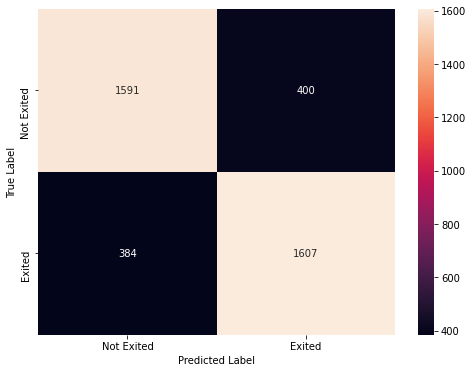

In [135]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.xticks([0.5,1.5],labels=['Not Exited', 'Exited'])
plt.yticks([0.5,1.5],labels=['Not Exited', 'Exited'])
plt.show()